In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")


In [7]:
noShow = pd.read_csv('noshowappt.csv')
noShow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
noShow.ScheduledDay = noShow.ScheduledDay.apply(np.datetime64)
noShow.AppointmentDay = noShow.AppointmentDay.apply(np.datetime64)

noShow["daysToAppointment"] = noShow.AppointmentDay - noShow.ScheduledDay

In [12]:
noShow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysToAppointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


In [13]:
noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 95)]

In [20]:
noShow = noShow[(noShow.daysToAppointment >= '3 days')]
noShow = noShow[(noShow.daysToAppointment <= '350 days')]

In [25]:
sms = noShow[(noShow.SMS_received == 1)]
nosms = noShow[(noShow.SMS_received == 0)]

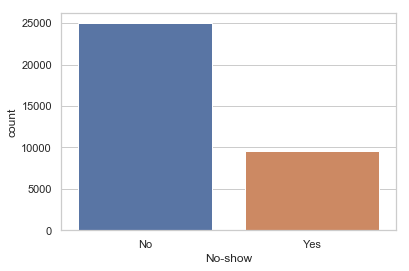

In [54]:
sns.set(style="whitegrid")
ax = sns.countplot(x="No-show", order = ("No","Yes"), data=sms)

In [36]:
pd.value_counts(sms['No-show'].values, sort=False)

No     24981
Yes     9591
dtype: int64

In [37]:

sms.shape

(34572, 15)

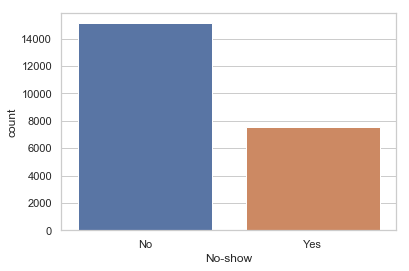

In [55]:
sns.set(style="whitegrid")
ax = sns.countplot(x="No-show", data=nosms)

In [38]:
pd.value_counts(nosms['No-show'].values, sort=False)

No     15126
Yes     7569
dtype: int64

In [39]:
nosms.shape

(22695, 15)

In [40]:
schol = noShow[(noShow.Scholarship == 1)]

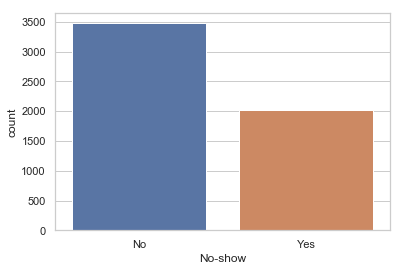

In [56]:
sns.set(style="whitegrid")
ax = sns.countplot(x="No-show", data=schol)

In [41]:
schol_sms = schol[(schol.SMS_received == 1)]
schol_nosms = schol[(schol.SMS_received == 0)]

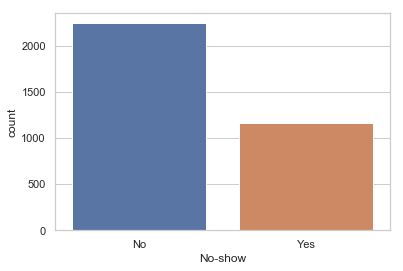

In [42]:
sns.set(style="whitegrid")
ax = sns.countplot(x="No-show", data=schol_sms)

In [44]:
pd.value_counts(schol_sms['No-show'].values, sort=False)

No     2242
Yes    1157
dtype: int64

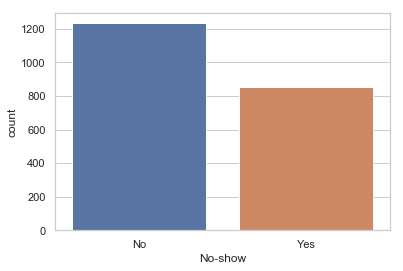

In [43]:
sns.set(style="whitegrid")
ax = sns.countplot(x="No-show", data=schol_nosms)

In [45]:
pd.value_counts(schol_nosms['No-show'].values, sort=False)

No     1233
Yes     854
dtype: int64